In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
data = pd.read_csv('BankChurners.csv', )

In [3]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
data.shape

(10127, 23)

In [5]:
df = data.iloc[:,0:21]
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [7]:
df.shape

(10127, 21)

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [10]:
var_cat = [i for i in df.columns if df[i].dtypes == 'O']
var_cat

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [11]:
len(var_cat)

6

In [12]:
var_num = [i for i in df.columns if df[i].dtypes != 'O']

In [13]:
len(var_num)

15

In [14]:
duplicated_rows = df.duplicated() == True

In [16]:
# On pouvait également faire df.duplicated().sum(). Cela retourne le nombre de lignes répétées du dataframe

In [15]:
len(df[duplicated_rows])

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [17]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [18]:
df.describe(include='O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [21]:
df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

## Visualisation de notre target

In [19]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [20]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [21]:
df['Attrition_Flag'].value_counts()/df.shape[0]

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

<AxesSubplot:ylabel='Attrition_Flag'>

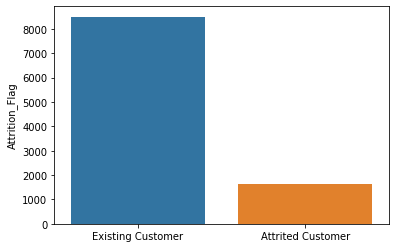

In [22]:
plt.figure()
sns.barplot(x = df['Attrition_Flag'].value_counts().index, y = df['Attrition_Flag'].value_counts())

<AxesSubplot:ylabel='Attrition_Flag'>

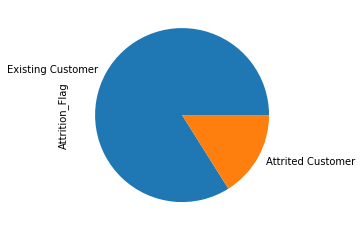

In [23]:
plt.figure()
df['Attrition_Flag'].value_counts().plot.pie()

In [24]:
for col in var_num:
    print(col,df[col].nunique())

CLIENTNUM 10127
Customer_Age 45
Dependent_count 6
Months_on_book 44
Total_Relationship_Count 6
Months_Inactive_12_mon 7
Contacts_Count_12_mon 7
Credit_Limit 6205
Total_Revolving_Bal 1974
Avg_Open_To_Buy 6813
Total_Amt_Chng_Q4_Q1 1158
Total_Trans_Amt 5033
Total_Trans_Ct 126
Total_Ct_Chng_Q4_Q1 830
Avg_Utilization_Ratio 964


## Analyse univariée des variables numériques

In [25]:
var_num = var_num[1:]
var_num

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [26]:
var_num_cont = [var for var in var_num if df[var].nunique()>7]
var_num_cont

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

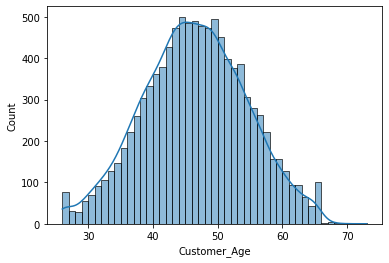

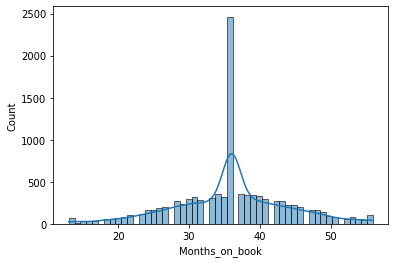

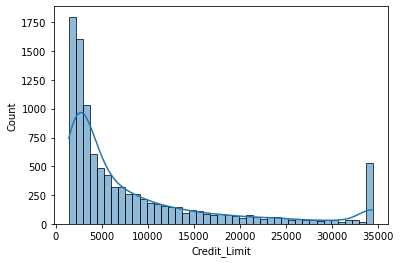

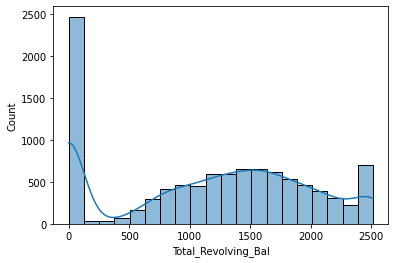

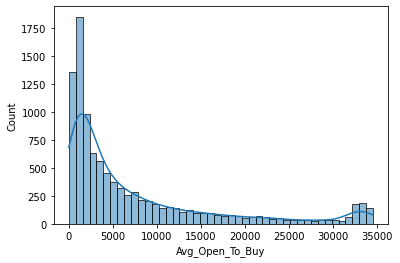

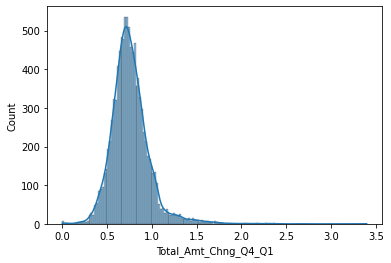

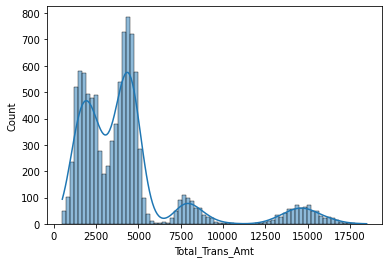

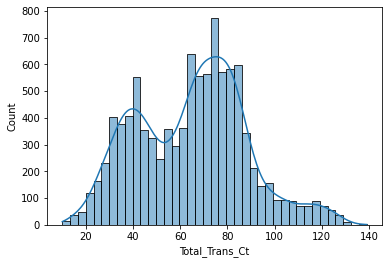

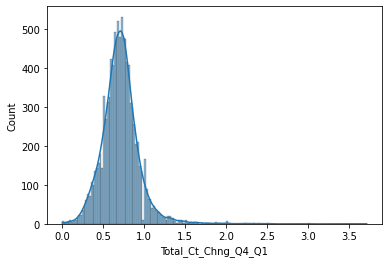

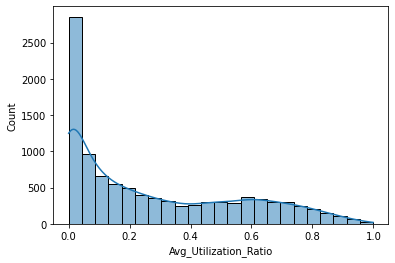

In [27]:
for col in var_num_cont:
    plt.figure()
    sns.histplot(df[col], kde = True)

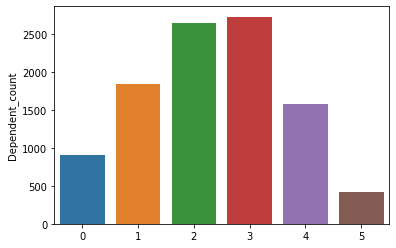

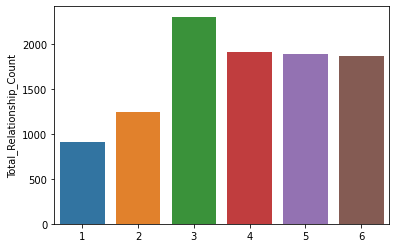

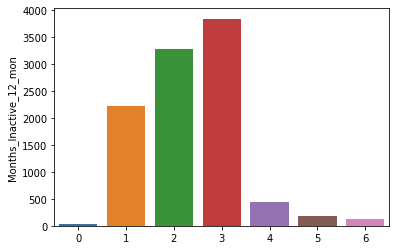

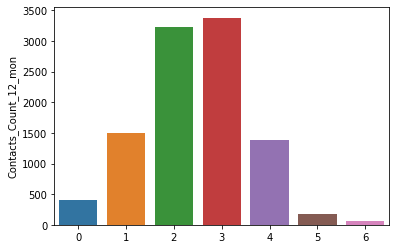

In [35]:
discrete_var = [var for var in var_num if var not in var_num_cont]
for var in discrete_var:
    plt.figure()
    sns.barplot(x=df[var].value_counts().index, y = df[var].value_counts())

## Vérification de l'existence d'outliers dans les variables numériques

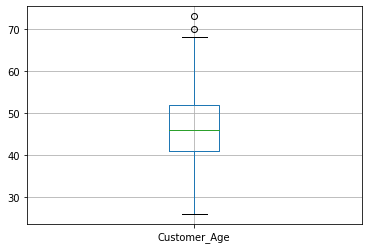

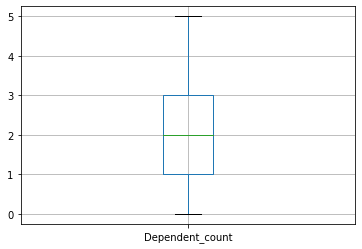

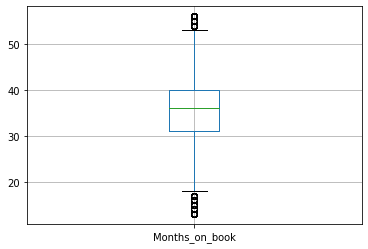

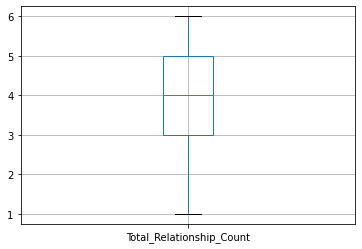

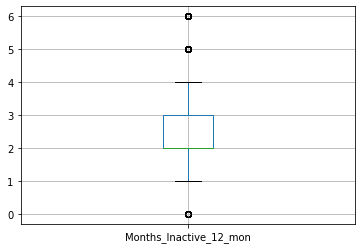

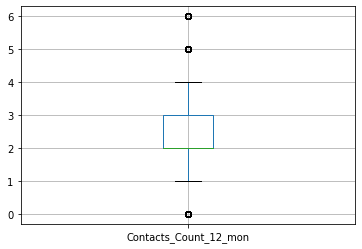

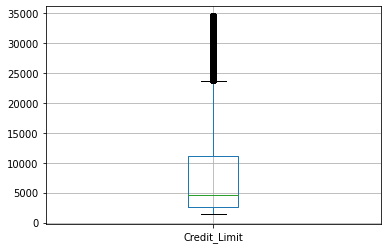

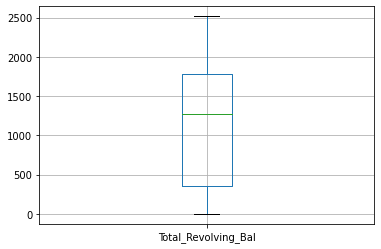

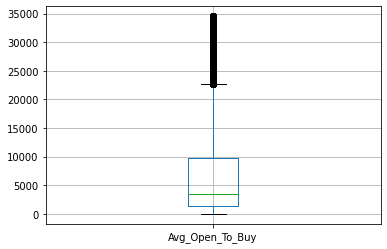

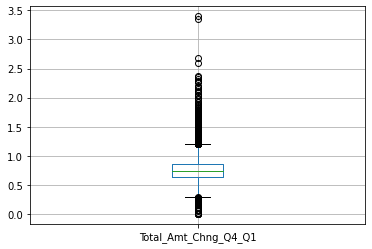

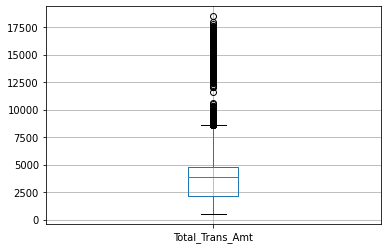

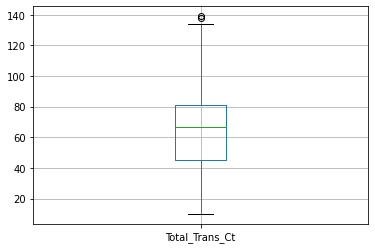

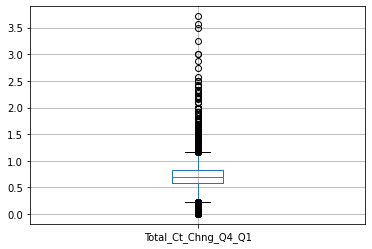

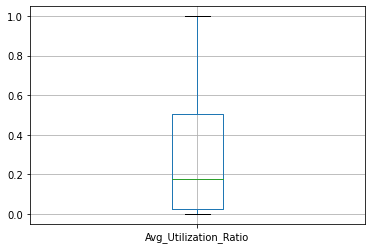

In [28]:
for var in var_num:
    plt.figure()
    df.boxplot(column=var)

## Analyse univariée des variables catégoriques

In [29]:
for var in var_cat:
    print(var, df[var].nunique())

Attrition_Flag 2
Gender 2
Education_Level 7
Marital_Status 4
Income_Category 6
Card_Category 4


In [30]:
for var in var_cat:
    print(var)
    print( df[var].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Gender
F    5358
M    4769
Name: Gender, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [35]:
# Recherche des labels rares
for var in var_cat:
    print(var)
    for label in df[var].unique():
        print (f"{label:-<50} {len (df[df[var] == label])/df.shape[0]}")

Attrition_Flag
Existing Customer--------------------------------- 0.8393403772094401
Attrited Customer--------------------------------- 0.1606596227905599
Gender
M------------------------------------------------- 0.4709193245778612
F------------------------------------------------- 0.5290806754221389
Education_Level
High School--------------------------------------- 0.1987755505085415
Graduate------------------------------------------ 0.308877258813074
Uneducated---------------------------------------- 0.14683519304828677
Unknown------------------------------------------- 0.14999506270366347
College------------------------------------------- 0.10002962377801916
Post-Graduate------------------------------------- 0.05095289819294954
Doctorate----------------------------------------- 0.044534412955465584
Marital_Status
Married------------------------------------------- 0.4628221585859583
Single-------------------------------------------- 0.3893551890984497
Unknown-------------------------

In [31]:
for var in var_cat:
    print(var, df[var].unique())

Attrition_Flag ['Existing Customer' 'Attrited Customer']
Gender ['M' 'F']
Education_Level ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category ['Blue' 'Gold' 'Silver' 'Platinum']


In [32]:
var_cat = var_cat[1:]

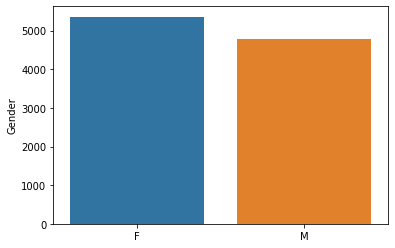

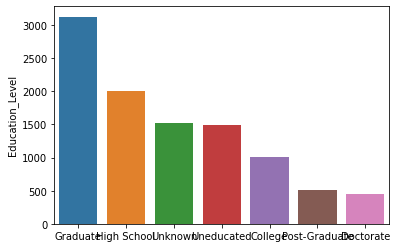

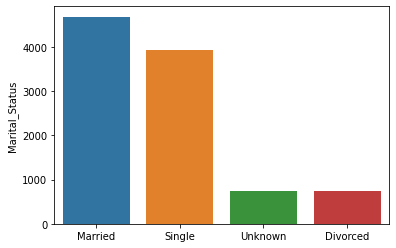

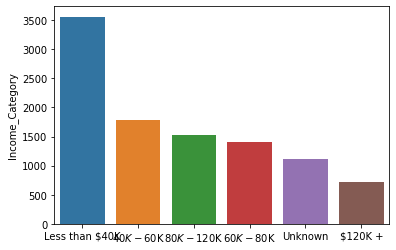

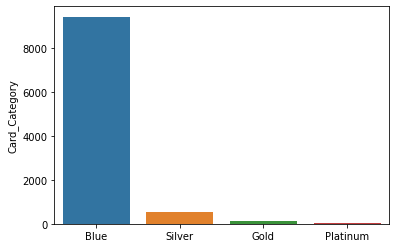

In [33]:
for var in var_cat:
    plt.figure()
    sns.barplot(x = df[var].value_counts().index, y = df[var].value_counts())

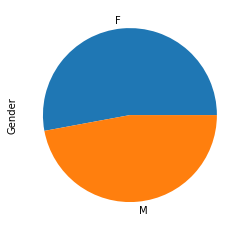

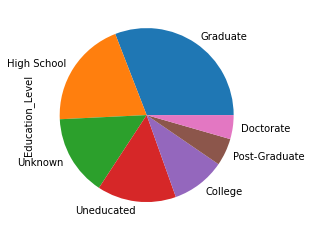

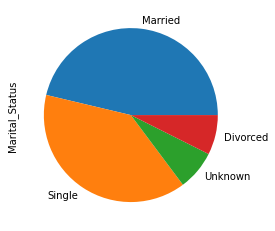

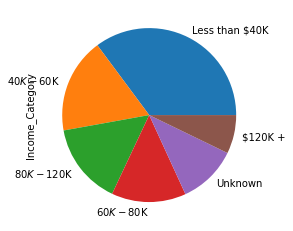

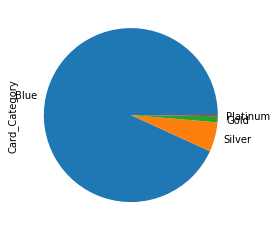

In [39]:
for var in var_cat:
    plt.figure()
    df[var].value_counts().plot.pie()

## Analyse bivariée: Target/variables numériques

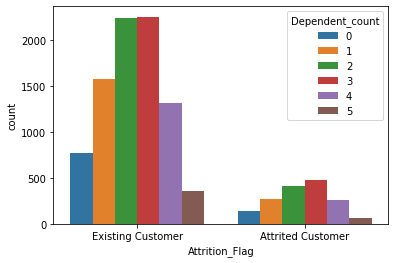

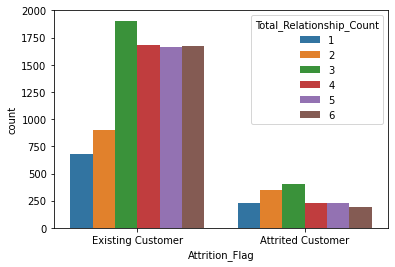

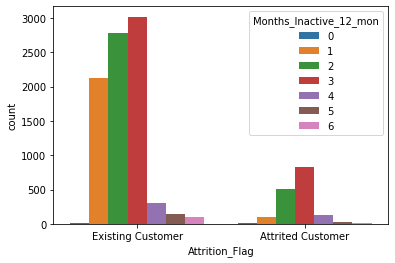

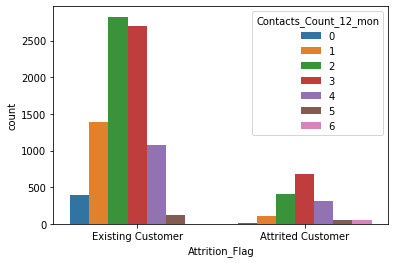

In [36]:
for var in discrete_var:
    plt.figure()
    sns.countplot(x = 'Attrition_Flag', hue = var, data = df)

In [37]:
# Divisons le dataset en 2 sous-ensembles: churn_df et non_churn_df

churn_df = df[df['Attrition_Flag'] == 'Attrited Customer']
non_churn_df = df[df['Attrition_Flag'] == 'Existing Customer']

In [38]:
print(len(churn_df))
print(len(non_churn_df))

1627
8500


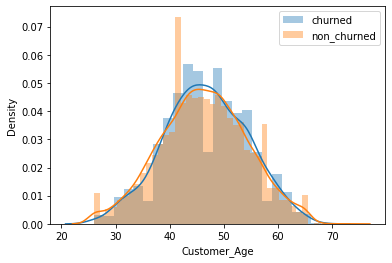

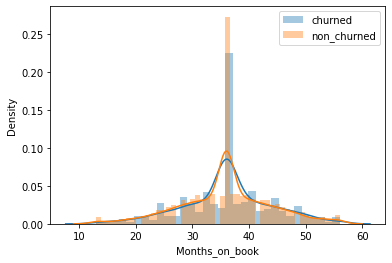

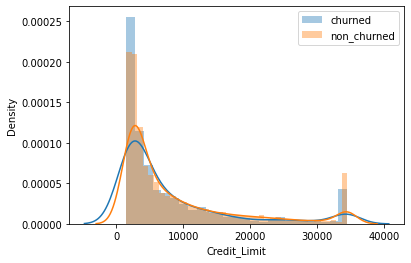

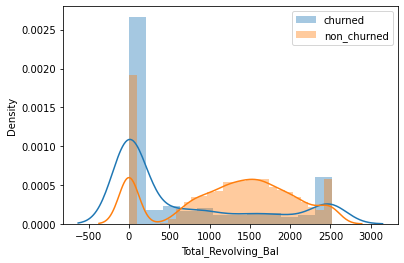

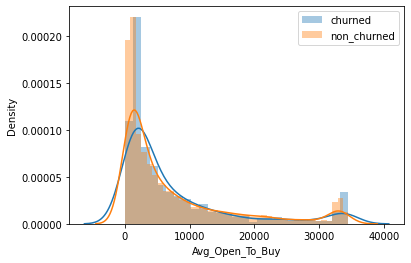

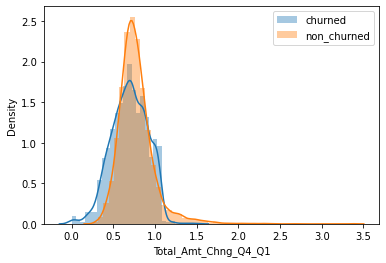

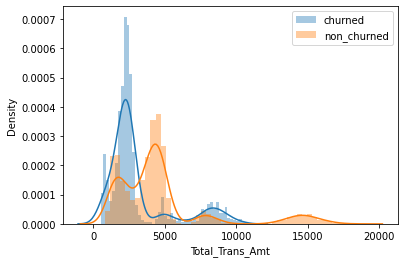

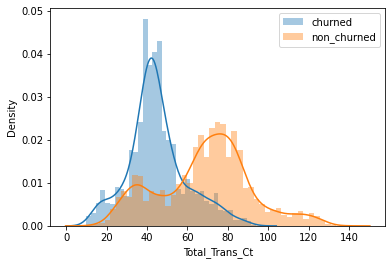

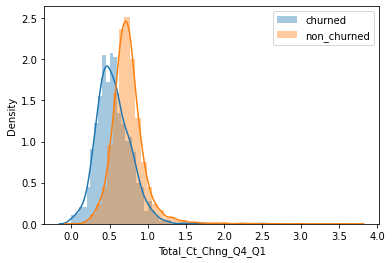

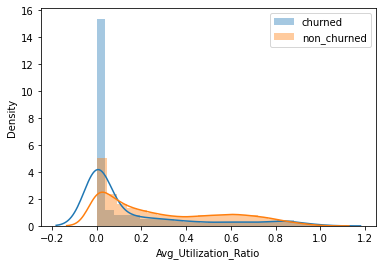

In [39]:
for col in var_num_cont:
    plt.figure()
    sns.distplot(churn_df[col], kde = True, label='churned')
    sns.distplot(non_churn_df[col], kde = True, label='non_churned')
    plt.legend()

## Analyse bivariée: Target/variables catégoriques

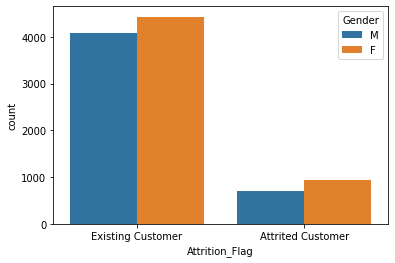

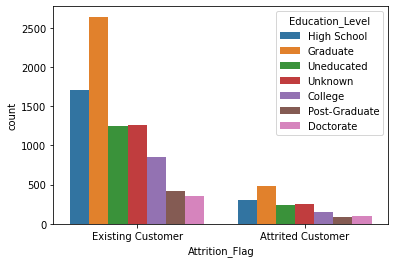

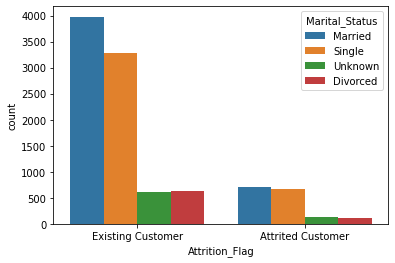

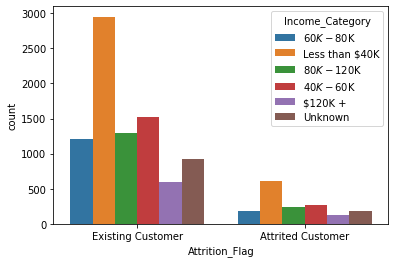

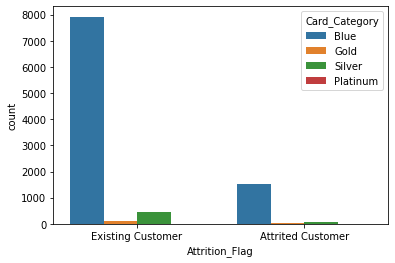

In [40]:
for var in var_cat:
    plt.figure()
    sns.countplot(x = 'Attrition_Flag', hue = var, data = df)

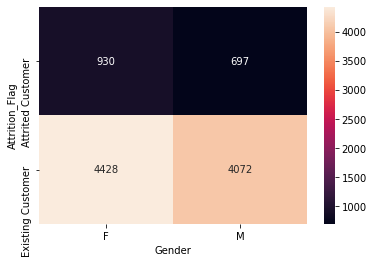

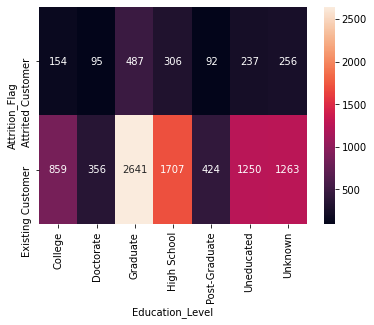

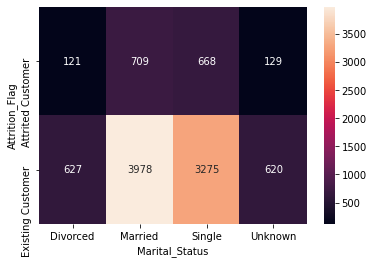

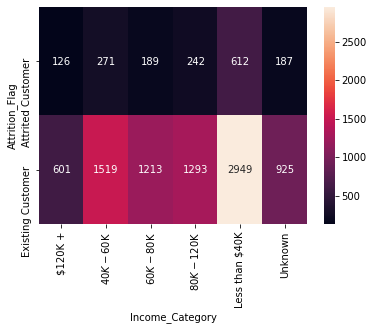

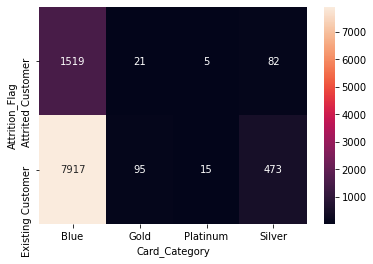

In [41]:
for col in var_cat:
    plt.figure()
    sns.heatmap(pd.crosstab(df['Attrition_Flag'],df[col]), annot = True, fmt = 'd')

In [46]:
print(len (churn_df['Gender'] == 'M')/ len(df['Gender'] == 'M'))
print(len (non_churn_df['Gender'] == 'M')/ len(df['Gender'] == 'M'))

0.1606596227905599
0.8393403772094401


In [47]:
len (non_churn_df['Education_Level'] == 'High School')/ len(df['Education_Level'] == 'High School')

0.8393403772094401

In [48]:
#for var in var_cat:
    #print(var)
    #for label in df[var].unique():
        #print(label+'_churn', (len(churn_df[var] == label))/ ((len(churn_df[var] == label) + (len(non_churn_df[var] == label))))
        #print(label+'_non_churn', (len(non_churn_df[var] == label))/ ((len(churn_df[var] == label) + (len(non_churn_df[var] == label))

### Analyse un peu avancée 

### Relation entre variables numériques

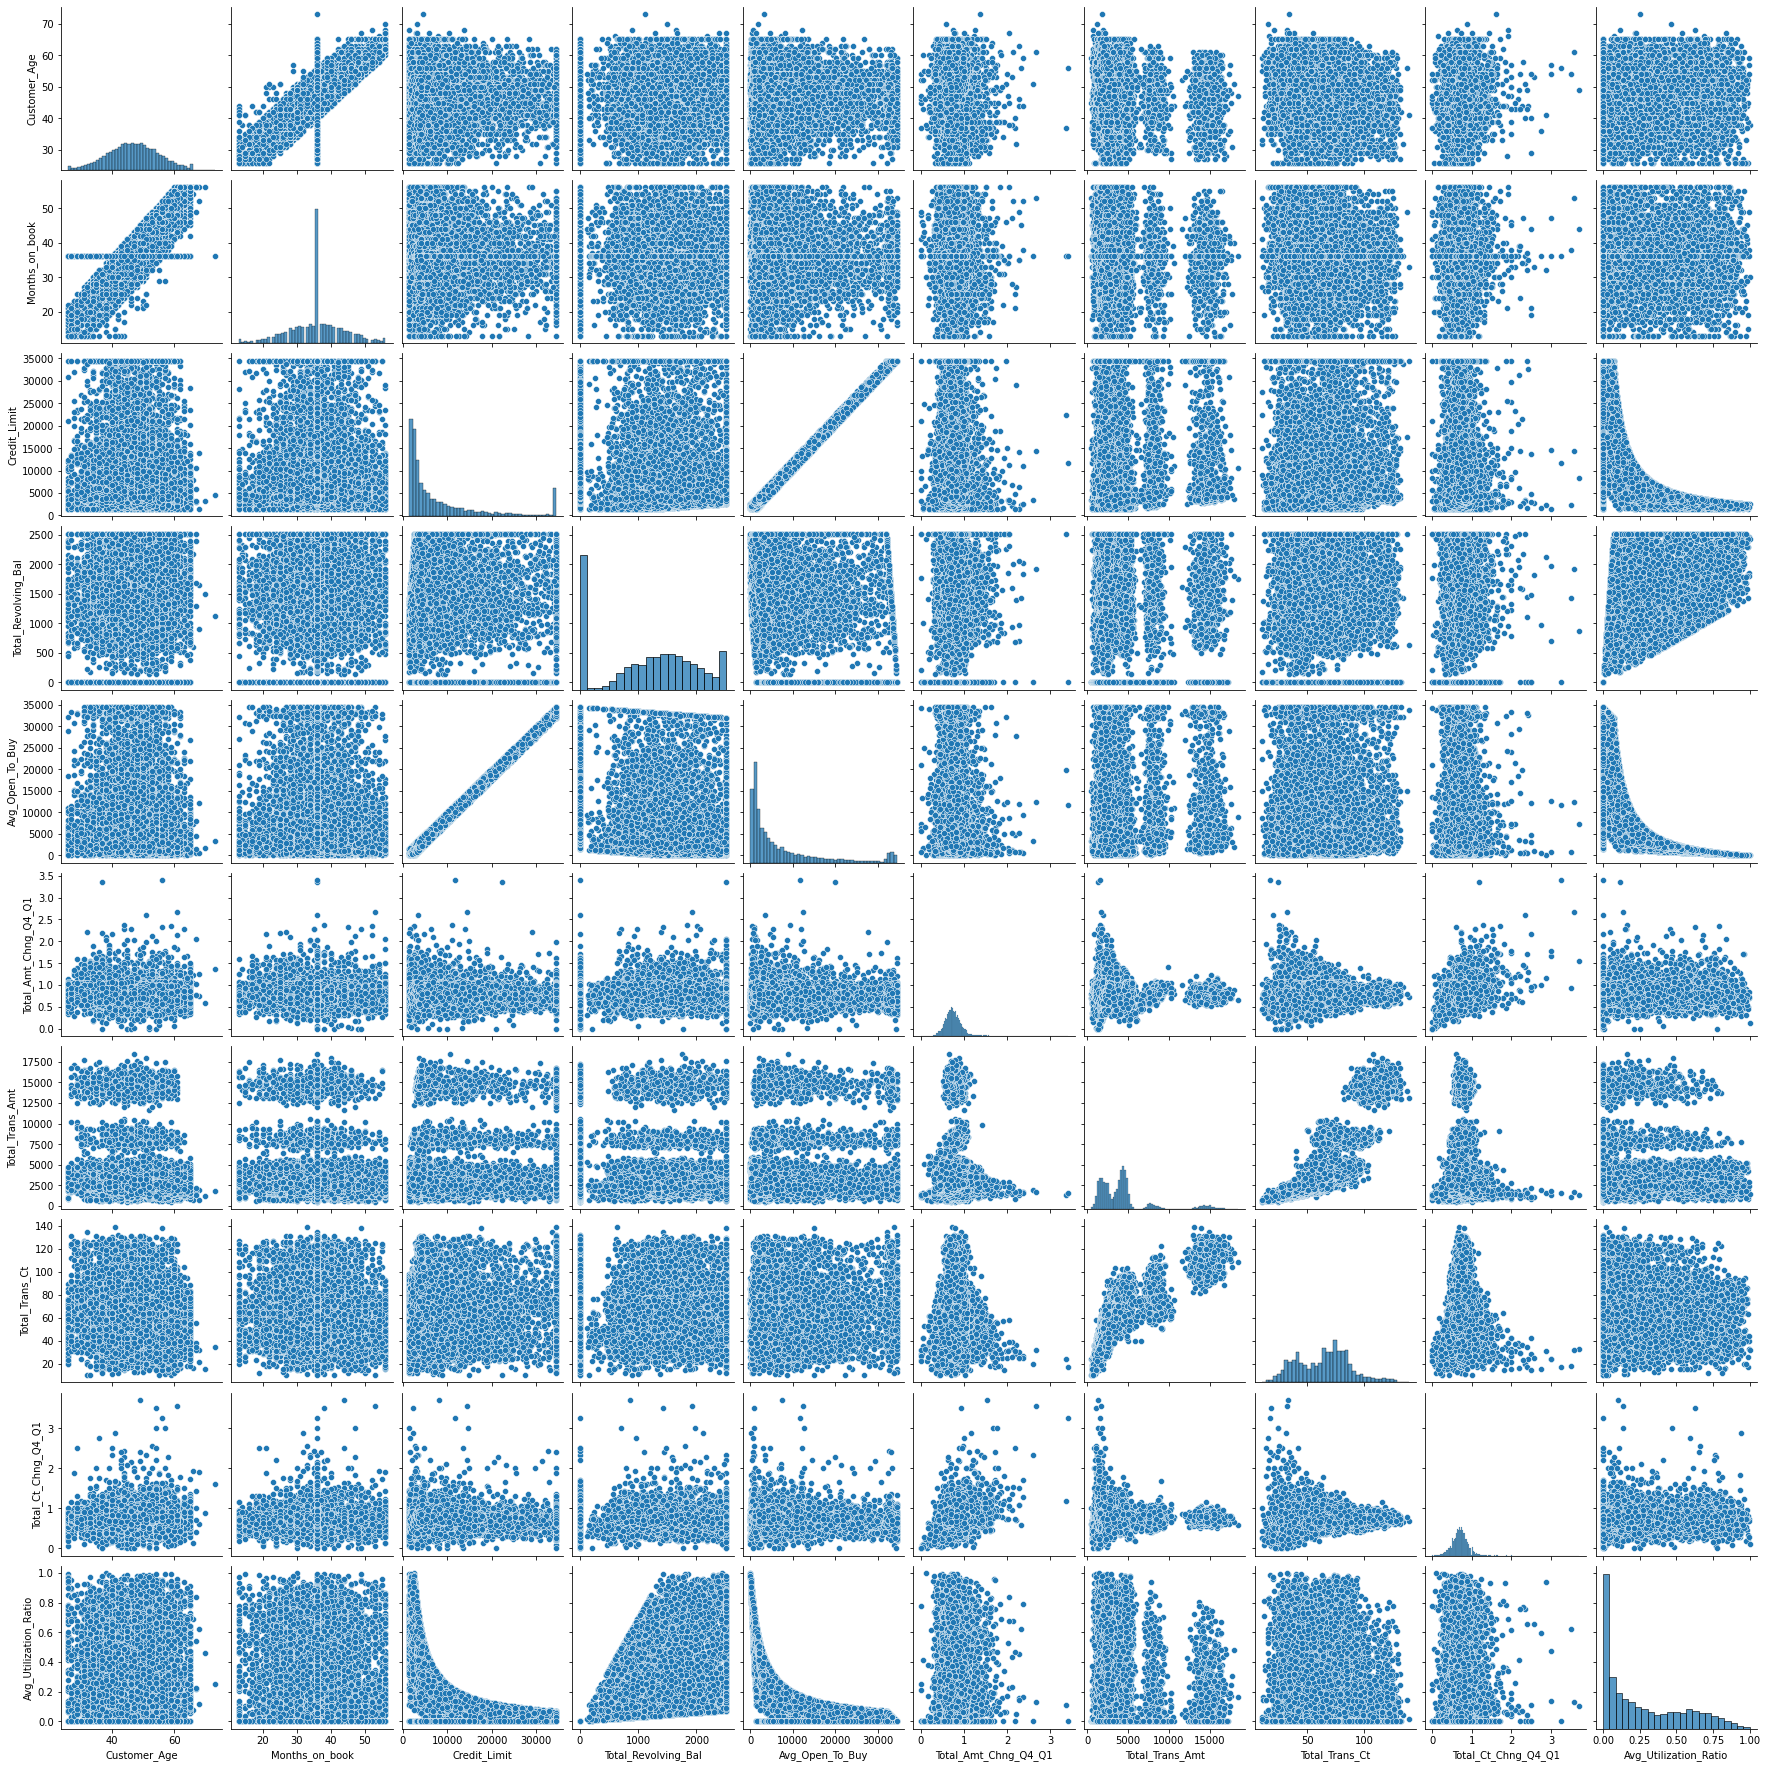

In [49]:
ax = sns.pairplot(df[var_num_cont])

#### Il n'existe pas de relations linéaires entre toutes les variables numériques

<AxesSubplot:>

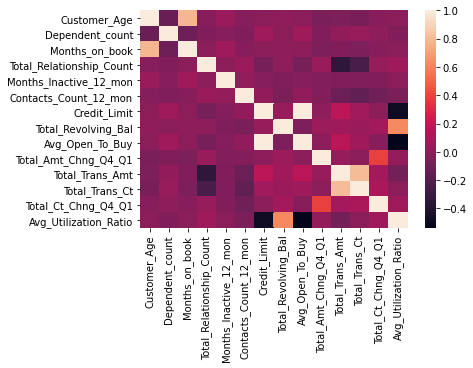

In [42]:
sns.heatmap(df[var_num].corr())

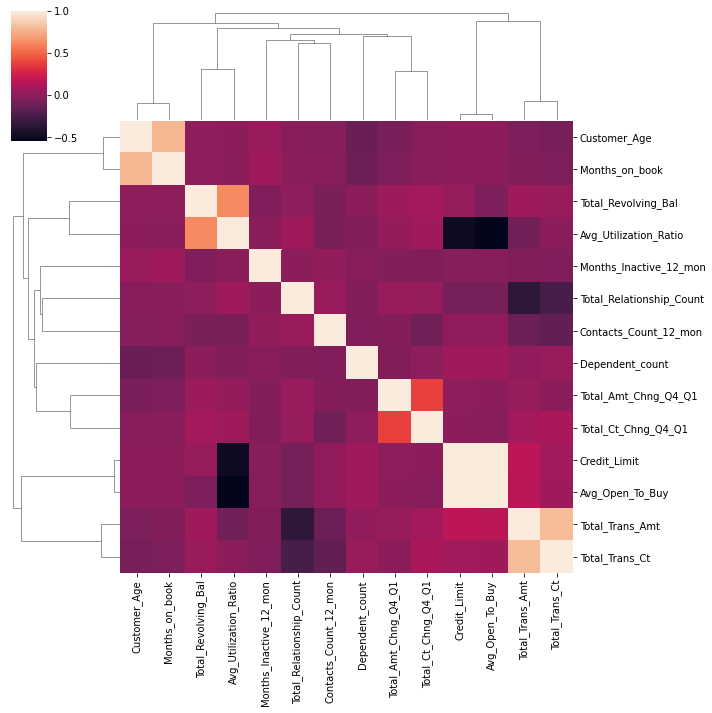

In [43]:
sns.clustermap(df[var_num].corr())

#### Il existe une correlation entre certaines variables. 

## Relation Salaire/Age

In [45]:
df.groupby('Income_Category')['Customer_Age'].median()

Income_Category
$120K +           49
$40K - $60K       46
$60K - $80K       46
$80K - $120K      47
Less than $40K    46
Unknown           46
Name: Customer_Age, dtype: int64

<AxesSubplot:xlabel='Income_Category'>

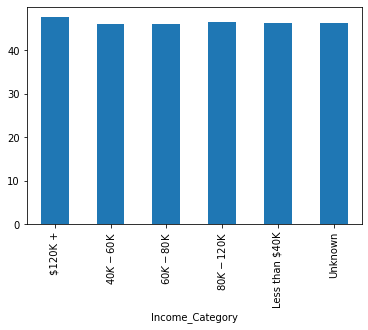

In [46]:
df.groupby('Income_Category')['Customer_Age'].mean().plot.bar()

#### Il n'existe à priori pas de relation entre l'age des clients et la catégorie de salaire. On peut s'amuser à faire test sataistique pour confirmer cela.

<AxesSubplot:xlabel='Education_Level'>

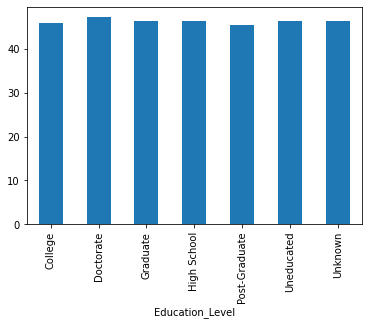

In [47]:
df.groupby('Education_Level')['Customer_Age'].mean().plot.bar()

#### Il n'existe à priori pas de relation entre l'age des clients et la catégorie de salaire. On peut s'amuser à faire test sataistique pour confirmer cela

<AxesSubplot:xlabel='Marital_Status'>

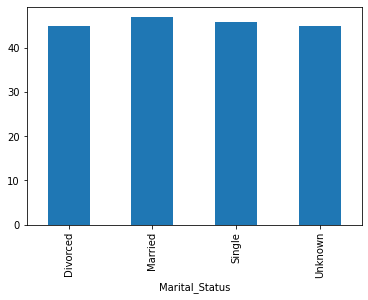

In [48]:
df.groupby('Marital_Status')['Customer_Age'].median().plot.bar()

## Tests statistiques

### On peut faire quelques tests statistiques pour connaître au mieux nos données et valider ou invalider certaines idées que nous avons eues en faisant une analyse descriptive de nos données

## H0: Il n'existe pas de différence significative entre les données de la variable numérique concernée et le statut du client

In [49]:
from scipy.stats import ttest_ind

In [50]:
balanced_non_churn = non_churn_df.sample(churn_df.shape[0])

In [51]:
def t_test(col):
    alpha = 0.05
    stat, p = ttest_ind(balanced_non_churn[col], churn_df[col])
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [52]:
for col in var_num:
    print(f'{col :-<50} {t_test(col)}')

Customer_Age-------------------------------------- 0
Dependent_count----------------------------------- 0
Months_on_book------------------------------------ 0
Total_Relationship_Count-------------------------- H0 Rejetée
Months_Inactive_12_mon---------------------------- H0 Rejetée
Contacts_Count_12_mon----------------------------- H0 Rejetée
Credit_Limit-------------------------------------- H0 Rejetée
Total_Revolving_Bal------------------------------- H0 Rejetée
Avg_Open_To_Buy----------------------------------- 0
Total_Amt_Chng_Q4_Q1------------------------------ H0 Rejetée
Total_Trans_Amt----------------------------------- H0 Rejetée
Total_Trans_Ct------------------------------------ H0 Rejetée
Total_Ct_Chng_Q4_Q1------------------------------- H0 Rejetée
Avg_Utilization_Ratio----------------------------- H0 Rejetée


## Test statistiques target par rapport aux variables catégorielles

In [65]:
from scipy.stats import chi2_contingency, chi2

In [66]:
## Test de relation entre les variables Gender et Attrition_Flag

In [67]:
contingency_data = pd.crosstab(df['Gender'], df['Attrition_Flag'])

In [68]:
contingency_data

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


In [81]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('Il existe un lien signification entre le sexe du client et le maintien ou pas de son service')
else:
    print('Pas de liens significatifs entre les variables Genre et Attrition Flag')

stat=13.866, p=0.000
Il existe un lien signification entre le sexe du client et le maintien ou pas de son service


In [70]:
## Test de relation entre les variables Marital_Status et Attrition_Flag

In [71]:
Marital_Status = pd.crosstab(df['Attrition_Flag'] , df['Marital_Status'])
Marital_Status

Marital_Status,Divorced,Married,Single,Unknown
Attrition_Flag,,,,
Attrited Customer,121,709,668,129
Existing Customer,627,3978,3275,620


In [84]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
contingency_table = Marital_Status.values
print(contingency_table)
stat, p, dof, expected = chi2_contingency(contingency_table)
# interpret test-statistic
prob = 0.95
print('probability=%.3f, stat=%.3f' % (prob, stat))
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Les deux variables sont significativement dépendantes ( H0 rejeté)')
else:
	print('Les deux variables sont indépendantes (H0 retenu)')

[[ 121  709  668  129]
 [ 627 3978 3275  620]]
probability=0.950, stat=6.056
significance=0.050, p=0.109
Les deux variables sont indépendantes (H0 retenu)
